1. 유저 국가 - 유저 수
2. 유저별 평가한 책의 수 (x축 책의 수 / y 축 1권 읽은 유저 수) 
3. x축 : 평균 1점 / y축 : 1점짜리 책의 수

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
books_df = pd.read_csv("Books.csv", dtype={"ISBN": str})
ratings_df = pd.read_csv("Filtered_Ratings.csv", dtype={"ISBN": str})
user_df = pd.read_csv("Users.csv")

/var/folders/1t/wjy5b0dn4z7133bq471_dzc00000gn/T/ipykernel_7946/2405229624.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("Books.csv", dtype={"ISBN": str})


In [36]:
user_df["country"] = None
a = user_df["Location"].str.split(",")
for i in a.index:
    user_df["country"][i] = a[i][-1]


/var/folders/1t/wjy5b0dn4z7133bq471_dzc00000gn/T/ipykernel_7946/1757043505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["country"][i] = a[i][-1]


In [37]:
user_df["country"]

0                     usa
1                     usa
2                  russia
3                portugal
4          united kingdom
               ...       
278853                usa
278854     united kingdom
278855             canada
278856                usa
278857            ireland
Name: country, Length: 278858, dtype: object

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1031131,276704,0876044011,0
1031132,276704,1563526298,9
1031133,276706,0679447156,0
1031134,276709,0515107662,10


In [ ]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [78]:
user_df["country"].unique()
country_count = user_df.groupby("country").count()

In [80]:
country_count

,User-ID,Location,Age
country,,,
,4578,4578,1996
&#20013;&#22269;,1,1,1
&#32654;&#22269;,1,1,1
*,1,1,0
-,1,1,0
...,...,...,...
zimbabwe,24,24,17
ä¸­å?½,2,2,2
öð¹ú,8,8,5


# 수정필요 국가별 수

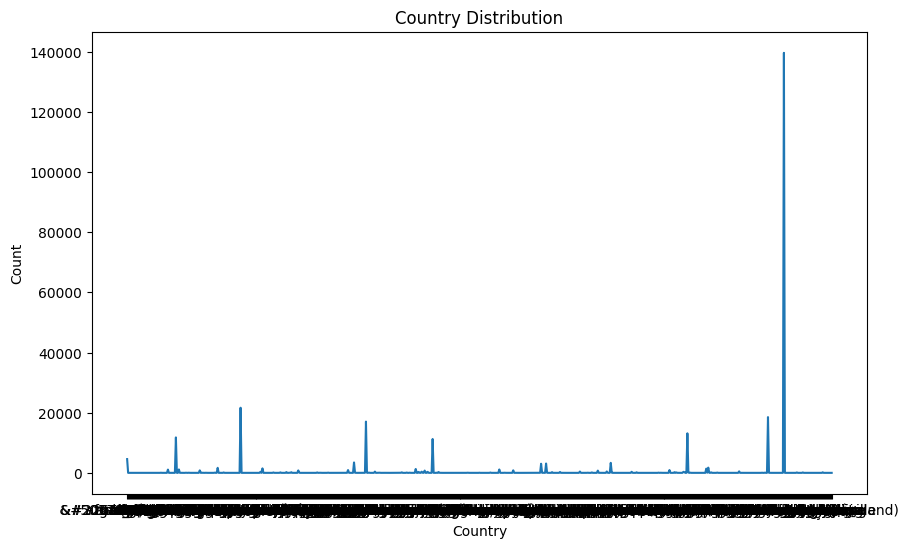

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(country_count.index, country_count["Location"])
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# 읽은 책 수 별 유저 수 

In [62]:
a = ratings_df.groupby("User-ID").count()
reading_count = a.groupby("ISBN").count()
reading_count

,Book-Rating
ISBN,
1,51270
2,10812
3,5756
4,3855
5,2699
...,...
5646,1
5779,1
5814,1


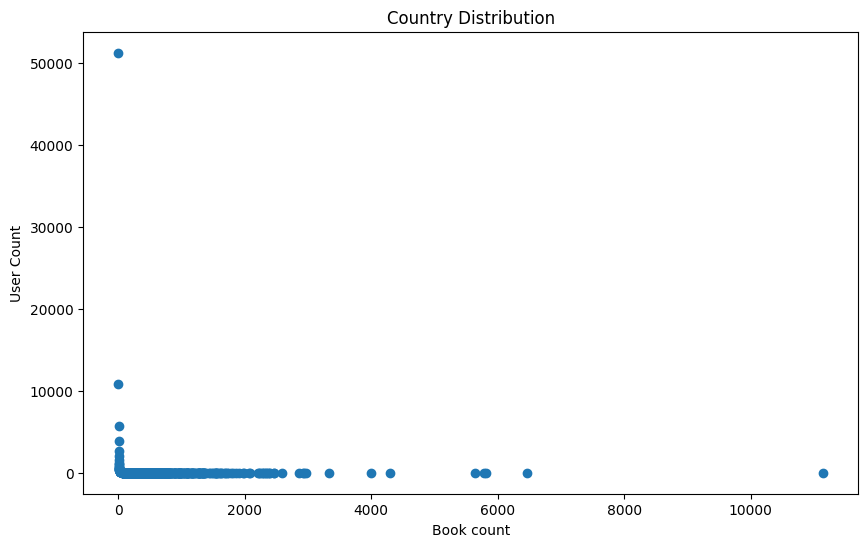

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(reading_count.index,reading_count["Book-Rating"])
plt.title('reading Distribution')
plt.xlabel('Book count')
plt.ylabel('User Count')
plt.show()

# 평점별 유저수

In [69]:
rating_count = ratings_df.groupby("Book-Rating").count()

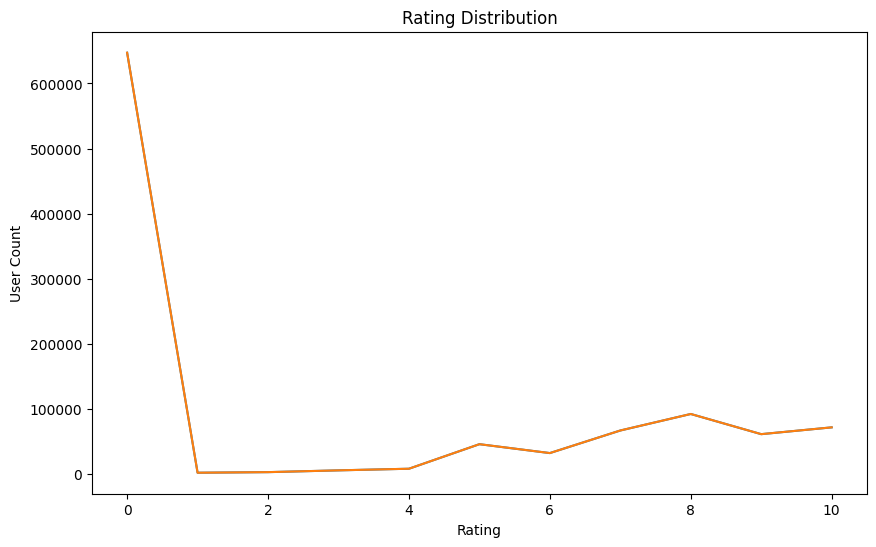

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(rating_count.index,rating_count)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('User Count')
plt.show()